# Classification Example.
This is an example of the workflow for the classification template.  Using the titanic dataset, try to predict survival.

In [79]:
## Dependencies.  Comment out extras.

## Basics. 
import pandas as pd
import numpy as np
import seaborn as sns

## Models.
from sklearn.ensemble import RandomForestRegressor
# import xgboost
# import lightgbm

## Other sklearn.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Other
# from datetime import Datetime

In [80]:
## Load Dataset.
full_data = pd.read_csv('./data/titanic.csv', index_col='PassengerId')

full_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
## Determine taget feature and instantiate training/validation sets.
target = 'Survived'
X, y = full_data.drop(target, axis=1), full_data[target]

# For time-series data the shuffle parameter should be False.
# For targets with uneven distributions stratify should be True.
(X, 
 X_valid, 
 y, 
 y_valid) = train_test_split(X, 
                             y,
                             test_size=.25,
                             random_state=42,
                             shuffle=True,
                             stratify=None)

,dtype,missing
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,132
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,519
Embarked,object,2


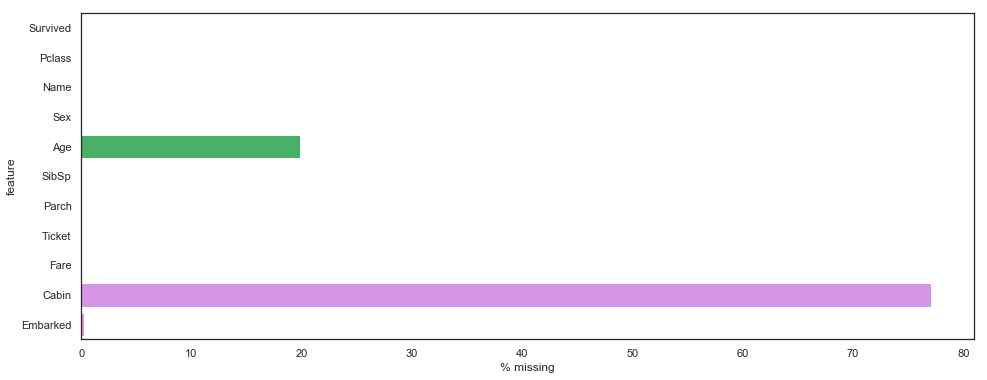

In [134]:
## Examine missing values.  
## Need to know how many are missing and the dtype to determine a strategy.
plt.figure(figsize=(16, 6))
missing = full_data.isnull().sum() / len(full_data.index) % 100
ax = sns.barplot(missing * 100, missing.index, orient='h')
ax.set(ylabel='feature', xlabel='% missing')

foo = pd.concat( [X.dtypes, X.isnull().sum()], axis=1)
foo.columns = 'dtype missing'.split()
foo

In [ ]:
## Fix missing points.


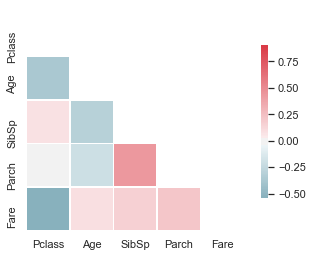

In [99]:
## Feature Correlation.
# (after https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

In [145]:
# sns.pairplot(data=X)